In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Data Cleaning

In [3]:
adult =pd.read_csv("adult.csv")
adult[adult["education.num"]==15]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
32,52,Private,198863,Prof-school,15,Divorced,Exec-managerial,Not-in-family,White,Male,0,2559,60,United-States,>50K
37,51,Private,197163,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,2559,50,United-States,>50K
50,40,Self-emp-not-inc,335549,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2444,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,52,Self-emp-not-inc,42984,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States,>50K
31908,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
31918,33,Private,72338,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,65,Japan,>50K
32290,51,Self-emp-inc,28765,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [4]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This tells us the dataset has no missing values, but upon inspection, we see several columns having "?" as values.

In [7]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

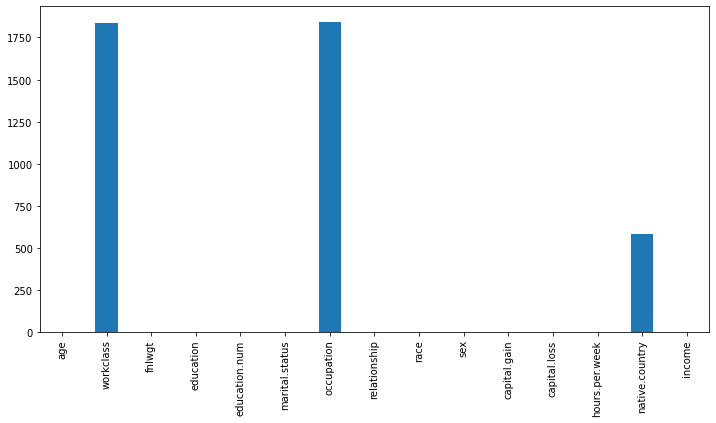

In [8]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

Let's see how much data we would lose if we just dropped the null values.

In [9]:
df2 = df.dropna()
percent_dropped = (df.shape[0] - df2.shape[0])/df.shape[0]*100
print(percent_dropped)

7.367709836921471


7% is significant so let's replace the values with the mode of each column

In [10]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

We should also check for duplicates and only keep one of each unique value.

In [11]:
df.duplicated().sum()

24

In [12]:
df=df.drop_duplicates(keep="first")

In [14]:
cat_feats = df.select_dtypes(include=['object']); cat_feats.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [15]:
df = df.drop(['education','fnlwgt'], axis=1);df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [16]:
df["education.num"].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [17]:
income_mapper = {'<=50K':0,'>50K':1}
df['income'] = df['income'].map(income_mapper)
df['native.country']=np.where(df["native.country"]=='United-States',1,0)
df['sex']=np.where(df["sex"]=="Male", 1, 0)
df = df.rename(columns={"native.country":"native", "sex":"male"})
categorical_columns =['workclass','marital.status','occupation','relationship','race']
for col in categorical_columns:
    cat_list = pd.get_dummies(df[col], prefix=col)
    df=df.join(cat_list)
df = df.drop(columns=categorical_columns)
df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,9,0,0,4356,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,54,4,0,0,3900,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,41,10,0,0,3900,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32558,40,9,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
income_df = df.drop(columns=['relationship_Husband','relationship_Unmarried', 'relationship_Wife']); income_df

## Feature Selection

In [72]:
income_df = pd.read_csv('income_numerical2.csv', index_col=0); income_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,9,0,0,4356,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,0,3900,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,10,0,0,3900,40,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,40,9,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
income_df.columns

Index(['age', 'education.num', 'male', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-su

(45, 45)


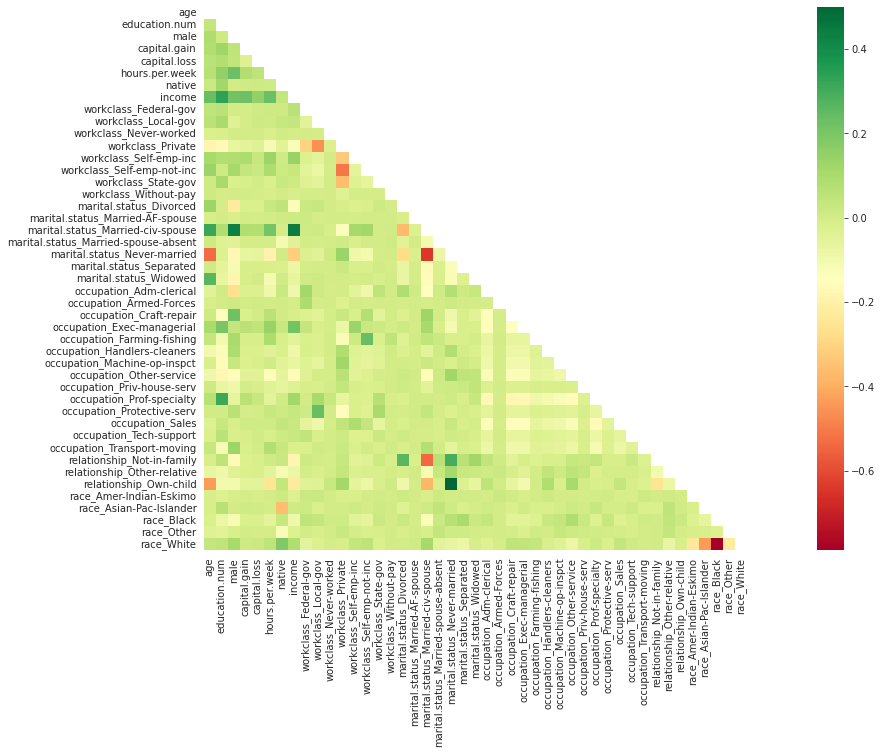

In [20]:
corr = income_df.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, cmap='RdYlGn')
#plt.savefig('multi4.png')
plt.show()

In [21]:
X = income_df.drop('income', axis=1)
y = income_df['income']

In [22]:
from sklearn.ensemble import RandomForestClassifier
selector = RandomForestClassifier(random_state=42)

selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [23]:
feature_imp = selector.feature_importances_

In [24]:
len(feature_imp)

44

In [25]:
top20 = feature_imp.argsort()[::-1][:20]; top20

array([ 0,  1,  5,  3, 17,  4, 19,  2, 25, 36, 31, 15, 38, 10,  6, 29, 12,
       33, 43, 24], dtype=int64)

In [26]:
cols = X.columns[top20]; cols

Index(['age', 'education.num', 'hours.per.week', 'capital.gain',
       'marital.status_Married-civ-spouse', 'capital.loss',
       'marital.status_Never-married', 'male', 'occupation_Exec-managerial',
       'relationship_Not-in-family', 'occupation_Prof-specialty',
       'marital.status_Divorced', 'relationship_Own-child',
       'workclass_Private', 'native', 'occupation_Other-service',
       'workclass_Self-emp-not-inc', 'occupation_Sales', 'race_White',
       'occupation_Craft-repair'],
      dtype='object')

In [27]:
feature_imp[top20]

array([0.2365921 , 0.14100901, 0.11469028, 0.11390159, 0.09063856,
       0.03868401, 0.03752652, 0.02082287, 0.01963375, 0.01785201,
       0.01230277, 0.01211723, 0.01139867, 0.0102393 , 0.00931832,
       0.008664  , 0.00829263, 0.0070641 , 0.00679671, 0.00655279])

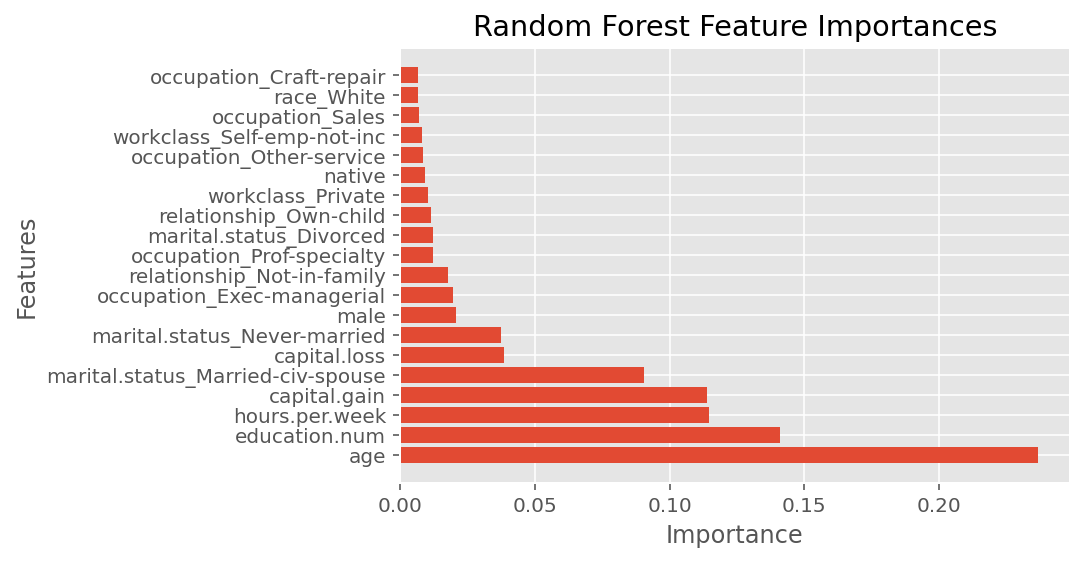

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(np.array(cols), feature_imp[top20], 'Random Forest')

In [29]:
cols = list(cols)
cols.append('income')

In [30]:
i_df = income_df[cols]

In [31]:
i_df

,age,education.num,hours.per.week,capital.gain,marital.status_Married-civ-spouse,capital.loss,marital.status_Never-married,male,occupation_Exec-managerial,relationship_Not-in-family,...,marital.status_Divorced,relationship_Own-child,workclass_Private,native,occupation_Other-service,workclass_Self-emp-not-inc,occupation_Sales,race_White,occupation_Craft-repair,income
0,90,9,40,0,0,4356,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,82,9,18,0,0,4356,0,0,1,1,...,0,0,1,1,0,0,0,1,0,0
2,66,10,40,0,0,4356,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,54,4,40,0,0,3900,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
4,41,10,40,0,0,3900,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,40,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,1,0,0
32557,27,12,38,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
32558,40,9,40,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
32559,58,9,40,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


# Naive Bayes

Naive Bayes works to fit a probabilistic distribution for every feature for every class and uses probabilities of individual samples to make a class prediction. The type of distribution can vary - Gaussian is the most common.
<br> According to Bayes Theorem:
$$ P(y_i | x_1, x_2, ... , x_n) = \frac{P(x_1, x_2, ... x_n| y_i)*P(y_i)}{P(x_1, x_2,... x_n)}$$ <br>
We can get rid of the denominator because it stays constant for all classes, so we can normalize by removing it. If we assume every feature is independent, we can come up with the naive assumption:
$$ P(y_i | x_1, x_2, ... , x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$
<br>
We can then calculate the class probability for each test sample and select the class with the highest probability.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [57]:
train_df, test_df = train_test_split(income_df, test_size=0.2, random_state=42,stratify=income_df['income'])

In [58]:
#train_df.to_csv("train_20.csv")
#test_df.to_csv("test_20.csv")

In [59]:
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

In [60]:
train_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
25267,21,10,1,0,0,20,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3349,41,11,1,4386,0,60,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4584,24,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7003,59,9,0,0,0,18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
882,35,9,1,0,1887,50,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31107,17,5,1,0,0,45,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
10982,42,5,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22425,55,10,1,0,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8200,22,9,1,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [61]:
X_dev = train_df.drop('income', axis=1)
y_dev = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

### Scaling

In [62]:
# scaler = MinMaxScaler()
# X_dev = scaler.fit_transform(X_dev)
# X_test = scaler.transform(X_test)

Scaling reduces performance significantly for Naive Bayes. This makes sense since the probability distribution is dependent on the range of values and scaling can alter the probability curve.

In [63]:
import time

### Gaussian Naive Bayes

In [64]:
gnb = GaussianNB()

gnb.fit(X_dev, y_dev)
gnb.score(X_test, y_test)

0.8088506453595574

In [65]:
gnb = GaussianNB()
print(f"Training on X_dev with {X_dev.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev, y_dev)
t_end = time.time()
print(f"Naive Bayes train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy = ", accuracy_score(y_test, ypred_gnb))
print('F1 score:', round(f1_score(y_test, ypred_gnb) * 100, 2))

Training on X_dev with 26029 samples
Naive Bayes train time = 0.0269162654876709
Naive Bayes prediction time = 0.008939743041992188
Naive Bayes test accuracy =  0.8088506453595574
F1 score: 64.25


### Gaussian Naive Bayes with SMOTE

In [44]:
smote = SMOTE(random_state=42)
gnb_pipe = imb_make_pipeline(smote, GaussianNB())

gnb_pipe.fit(X_dev, y_dev)
gnb_pipe.score(X_test, y_test)

0.779041180086048

In [45]:
gnb = GaussianNB()
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_smote with {X_dev_smote.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_smote, y_dev_smote)
t_end = time.time()
print(f"Naive Bayes with SMOTE train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_smote = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with SMOTE prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with SMOTE = ", accuracy_score(y_test, ypred_gnb_smote))
print('F1 score:', round(f1_score(y_test, ypred_gnb_smote) * 100, 2))

Training on X_dev_smote with 39516 samples
Naive Bayes with SMOTE train time = 0.038889408111572266
Naive Bayes with SMOTE prediction time = 0.007981061935424805
Naive Bayes test accuracy with SMOTE =  0.779041180086048
F1 score: 64.09


### Gaussian Naive Bayes with Random Oversampling

In [48]:
ros = RandomOverSampler(random_state=42)
gnb_pipe2 = imb_make_pipeline(ros, GaussianNB())

gnb_pipe2.fit(X_dev, y_dev)
gnb_pipe2.score(X_test, y_test)

0.8113091579594346

In [49]:
gnb = GaussianNB()
ros = RandomOverSampler(random_state=42)
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_ros with {X_dev_ros.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_ros, y_dev_ros)
t_end = time.time()
print(f"Naive Bayes with random oversampling train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_ros = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with random oversampling prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with random oversampling = ", accuracy_score(y_test, ypred_gnb_ros))
print('F1 score:', round(f1_score(y_test, ypred_gnb_ros) * 100, 2))

Training on X_dev_ros with 39516 samples
Naive Bayes with random oversampling train time = 0.03889799118041992
Naive Bayes with random oversampling prediction time = 0.006979227066040039
Naive Bayes test accuracy with random oversampling =  0.8113091579594346
F1 score: 64.36


### Results
#### Gaussian Naive Bayes with Random Oversampling performed best

In [66]:
print('Naive Bayes Classifier:')
y_pred_ros = gnb_pipe2.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ros) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ros) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 81.13
F1 score: 64.36


#### Compare to Random Forest

In [67]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)
rf_best.fit(X_dev, y_dev)
rf_best.score(X_test, y_test)

0.8417332513829133

In [68]:
print('Random Forest Classifier:')
y_pred = rf_best.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.17
F1 score: 64.68


Performance is very similar, in fact Naive Bayes has a higher F1 score than Random Forest. We can confidently say that the Naive Bayes Classifier can be used for this problem.

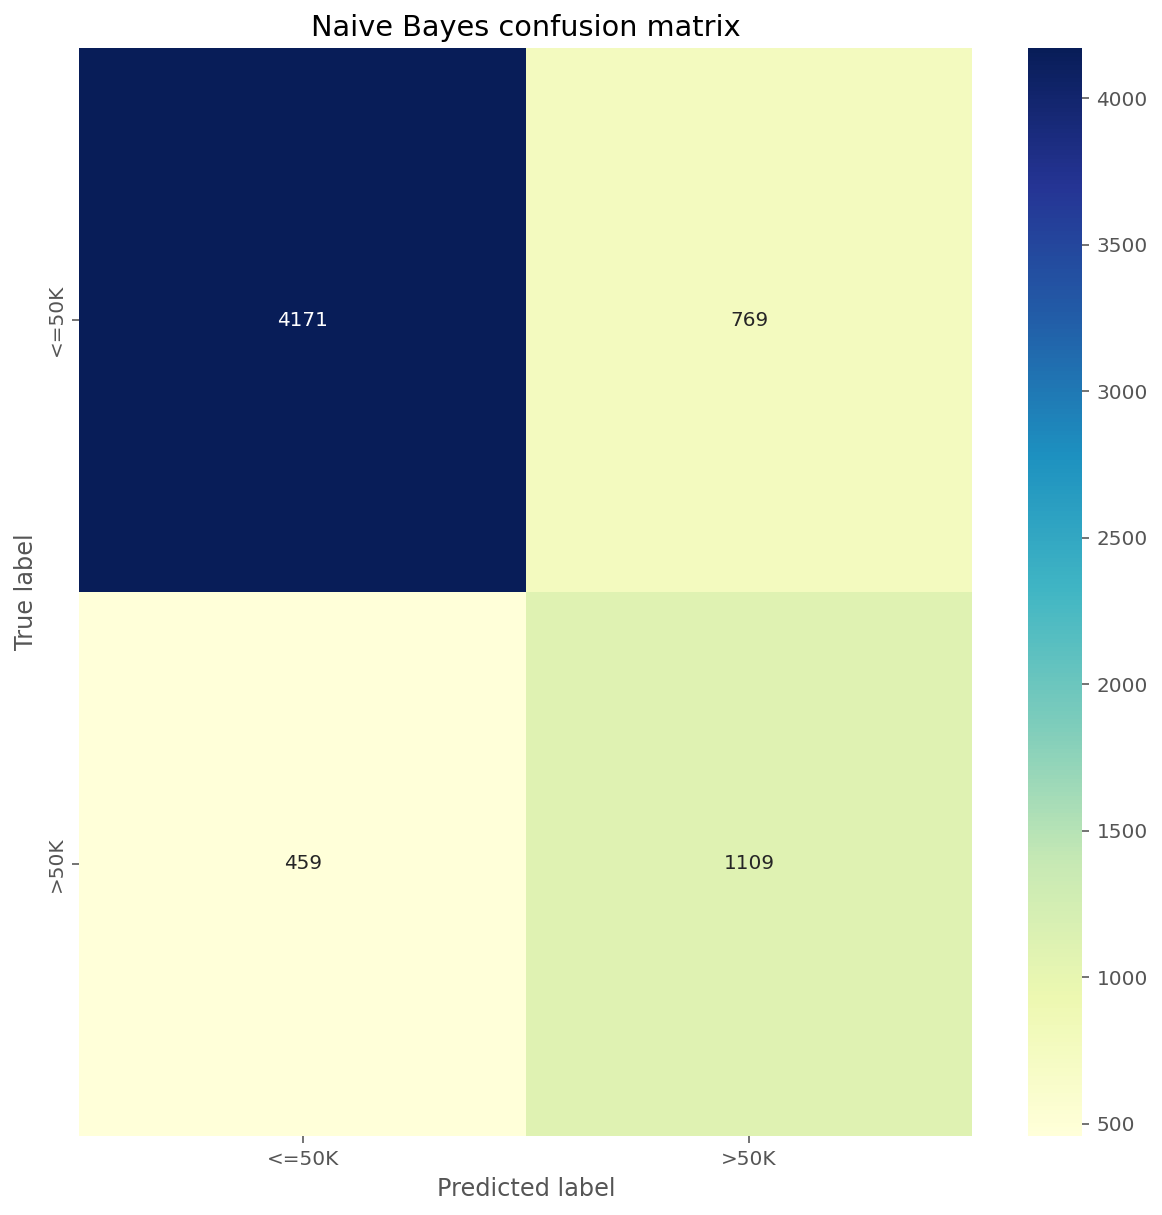

In [69]:
cm = confusion_matrix(y_test, y_pred_ros)
cm_df = pd.DataFrame(cm, index = ['<=50K','>50K'], columns = ['<=50K','>50K'])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Naive Bayes confusion matrix")
plt.savefig('heatmap_NB_one-hot.png')
plt.show()

In [70]:
print(classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4940
           1       0.59      0.71      0.64      1568

    accuracy                           0.81      6508
   macro avg       0.75      0.78      0.76      6508
weighted avg       0.83      0.81      0.82      6508

